In [45]:
# This program uses an artificial recurent neural network called Long Short Term Memory (LSTM)
# to predict the closing stock price of a corporation using the past 60 days stock price


In [46]:
import math
import datetime
from pandas_datareader import data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("fivethirtyeight") # specific type of plot

In [47]:
stock = 'AAPL'
stock = 'GOOGL'


start_date = "01/01/12"

end_date = "18/12/19"

start_date = "01/06/21"
end_date = "01/10/23"

def InputDates(startDate,endDate):
    start = datetime.datetime.strptime(startDate, "%d/%m/%y")
    end = datetime.datetime.strptime(endDate, "%d/%m/%y")

    end += datetime.timedelta(days=1)

    start = str(start.date())

    end = str(end.date())
    
    return start,end

def nextDayInputDate(endDate):

    end_nextDay = datetime.datetime.strptime(endDate, "%d/%m/%y")
    
    end_nextDay += datetime.timedelta(days=2)

    end_nextDay = str(end_nextDay.date())
    
    return end_nextDay

startDate,endDate = InputDates(start_date,end_date)
print("startDate :", startDate)
print("endDate :", endDate)


startDate : 2021-06-01
endDate : 2023-10-02


In [48]:
yf.pdr_override()
#Get the stock quote
df = web.get_data_yahoo(stock, start=startDate, end=endDate)
#df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-18')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,118.722000,119.285500,117.713997,119.058998,119.058998,23354000
2021-06-02,119.457497,119.681999,117.617996,118.529503,118.529503,21158000
2021-06-03,117.286499,117.850998,116.475998,117.378998,117.378998,18696000
2021-06-04,118.463501,119.951500,118.120499,119.678497,119.678497,24458000
2021-06-07,119.472000,120.225502,119.050003,120.114998,120.114998,24120000
...,...,...,...,...,...,...
2023-09-25,129.830002,131.169998,128.960007,131.110001,131.110001,20094600
2023-09-26,129.770004,130.360001,127.220001,128.570007,128.570007,25718700
2023-09-27,128.570007,130.899994,128.570007,130.539993,130.539993,22746500


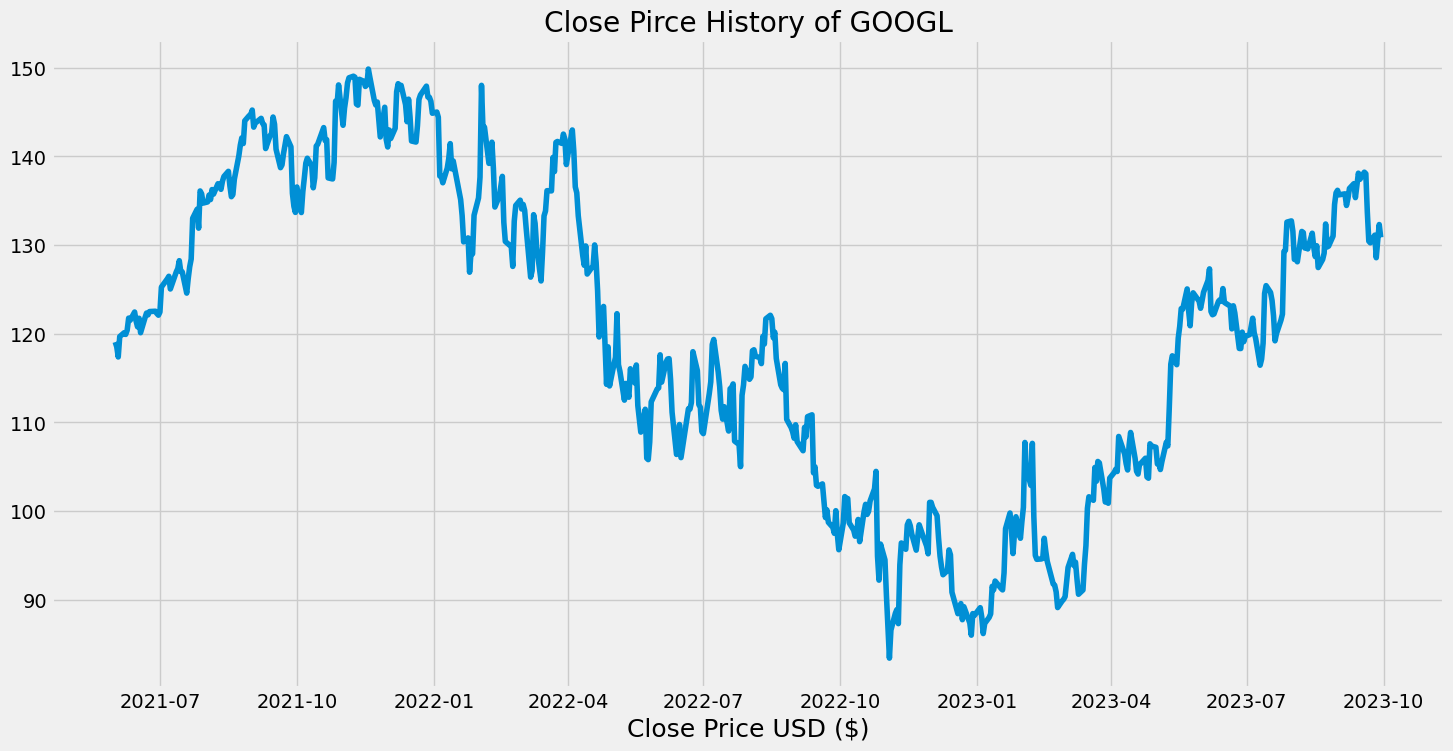

In [49]:
#Visualize the closing price history

plt.figure(figsize=(16,8))
plt.title('Close Pirce History of ' + stock)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.xlabel('Close Price USD ($)', fontsize=18)
plt.show()

In [50]:
#Creata a new dataframe woth only the 'Close column'ArithmeticError

data = df.filter(['Close'])
#Convert the dataframe to numpy array
dataset =  data.values

#Get the numer of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8) #we take 80% of row number, ceil renvoie le premier entier supérieur (ex: ceil(2.1) = 3)

training_data_len

471

In [51]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.53651261],
       [0.5285393 ],
       [0.51121464],
       [0.54584122],
       [0.55241418],
       [0.54950792],
       [0.55666071],
       [0.57713244],
       [0.57342059],
       [0.58750766],
       [0.57205782],
       [0.56231504],
       [0.57693667],
       [0.55235398],
       [0.5779757 ],
       [0.58577587],
       [0.58271152],
       [0.58832829],
       [0.58845627],
       [0.58887044],
       [0.58490251],
       [0.58214686],
       [0.58749261],
       [0.62985158],
       [0.6438935 ],
       [0.64817001],
       [0.62663662],
       [0.63378183],
       [0.6557218 ],
       [0.6612331 ],
       [0.67471783],
       [0.65616595],
       [0.65563897],
       [0.61961951],
       [0.64418715],
       [0.66435777],
       [0.67749599],
       [0.74666644],
       [0.76202599],
       [0.72987634],
       [0.79303091],
       [0.78826499],
       [0.77243878],
       [0.77436633],
       [0.78604402],
       [0.77844708],
       [0.79540261],
       [0.787

In [52]:
#create the training data set
# Create the scaled training data set

train_data = scaled_data[0:training_data_len]

#Split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range(60, len(train_data)) :
    # we use each time 60 values to preduct the 61th value
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

    if i <= 60 :
        print(x_train)
        print(y_train)

[array([0.53651261, 0.5285393 , 0.51121464, 0.54584122, 0.55241418,
       0.54950792, 0.55666071, 0.57713244, 0.57342059, 0.58750766,
       0.57205782, 0.56231504, 0.57693667, 0.55235398, 0.5779757 ,
       0.58577587, 0.58271152, 0.58832829, 0.58845627, 0.58887044,
       0.58490251, 0.58214686, 0.58749261, 0.62985158, 0.6438935 ,
       0.64817001, 0.62663662, 0.63378183, 0.6557218 , 0.6612331 ,
       0.67471783, 0.65616595, 0.65563897, 0.61961951, 0.64418715,
       0.66435777, 0.67749599, 0.74666644, 0.76202599, 0.72987634,
       0.79303091, 0.78826499, 0.77243878, 0.77436633, 0.78604402,
       0.77844708, 0.79540261, 0.78767769, 0.80536367, 0.80376768,
       0.79581689, 0.80959515, 0.81762865, 0.8263926 , 0.80157658,
       0.78331847, 0.78679675, 0.81314144, 0.85247375, 0.87084491])]
[0.8831549252409299]


In [53]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [54]:
#Reshape the data into 3 dimensional shape since LSTM need it
print("before reshape")
print(x_train.shape)


initialShape = x_train.shape
x_train = np.reshape(x_train,(initialShape[0], initialShape[1], 1))


print("\n after reshape ")
print(x_train.shape)

before reshape
(411, 60)

 after reshape 
(411, 60, 1)


In [55]:
#Build the LSTM model

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1) ))

model.add(LSTM(50, return_sequences=False))

model.add(Dense(25))

model.add(Dense(1))

c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
#Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [57]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1) 

411/411 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0224


In [58]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len-60:, :] # on prend à partir de -60 et on veut prédire la valeur à la position training_data_len

print(len(test_data))

x_test = []

y_test = dataset[training_data_len :, :]  # contient les valeurs prédites, qui commencent à partir de la position training_data_len


for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

177


In [59]:
#convert the data to a numpy array
x_test = np.array(x_test)


In [60]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [61]:
#Get the models predicted price values

predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions) #unscale the data to have the real values

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 436ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001EA332FF9C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step


In [62]:
# Get the Root Mean Squared Error (RMSE)

rsme = np.sqrt(np.mean(predictions - y_test)**2)
rsme # On average over an interval of [-4.37 , 4.37] $ compared with the real values

print("On average over an interval of ", [-round(rsme,2) , round(rsme,2)]," compared with the real values")

On average over an interval of  [-6.46, 6.46]  compared with the real values


C:\Users\Admin\AppData\Local\Temp\ipykernel_13512\3700428360.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


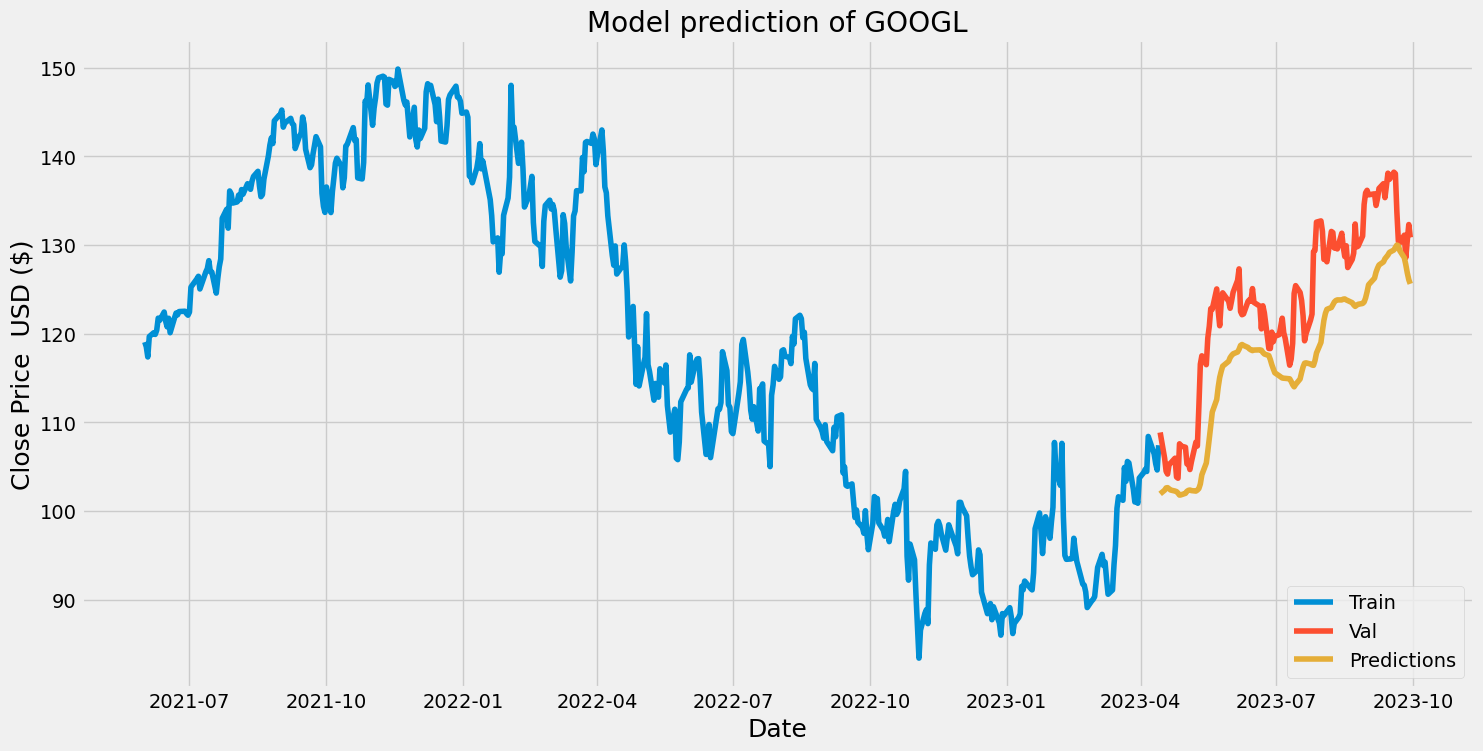

In [63]:
# Plot the data

train = data[: training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data

plt.figure(figsize=(16,8))
plt.title('Model prediction of '+stock)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price  USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [64]:
#Show the valid and predicted prices
valid

,Close,predictions
Date,,
2023-04-14,108.870003,101.945305
2023-04-17,105.970001,102.362816
2023-04-18,104.500000,102.616821
2023-04-19,104.180000,102.647018
2023-04-20,105.290001,102.517029
...,...,...
2023-09-25,131.110001,128.567947
2023-09-26,128.570007,127.779846
2023-09-27,130.539993,126.860001


In [65]:
# Get the quote
start_date = "01/06/23"
end_date = "01/10/23"

print("startDate :", start_date)
print("endDate :", end_date) 

startDate,endDate = InputDates(start_date,end_date)

apple_quote = web.get_data_yahoo(stock, start=startDate, end=endDate)

#Create a new dataframe

new_df = apple_quote.filter(['Close'])
print(new_df.shape)

#Get the last 60 days closing price values and convert the dataframe to an array

last_60_days = new_df[-60:].values

#Scal the data to be values between 0 and 1

last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list

X_test = []

#Append the past 60 days

X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array

X_test = np.array(X_test)

#Reshape the data

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price

pred_price = model.predict(X_test)

#undo the scaling

pred_price = scaler.inverse_transform(pred_price)

print("\n\nle prix prédit à la date " + endDate + " est : " + str(round(pred_price[0][0],2))+ " $")  #yyyy-mm-dd

startDate : 01/06/23
endDate : 01/10/23


[*********************100%%**********************]  1 of 1 completed

(84, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


le prix prédit à la date 2023-10-02 est : 125.25 $


In [66]:
#Get the real quote
print("nextEndDay ",endDate )
nextEndDate = nextDayInputDate(end_date)

real_quote = web.get_data_yahoo(stock, start=endDate, end=nextEndDate)
valeur = real_quote['Close'].iloc[0]
print("\n\nle prix réel à la date "+str(endDate) + " est " + str(round(valeur,4))+ " $")

#print(apple_quote1['Close'])

[*********************100%%**********************]  1 of 1 completed

nextEndDay  2023-10-02


le prix réel à la date 2023-10-02 est 134.17 $
